In [35]:
%reload_ext autoreload
%autoreload 2
# %matplotlib widget
%matplotlib notebook

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas
import os
import georasters as gr

from geo_scripts.process_height import *

In [42]:
et = np.load("./data/effective_temperature_large.npy")
et_mask = np.load("./data/effective_temperature_large_mask.npy")
et_masked = np.ma.array(et, mask=et_mask)

In [43]:
large_tpt = et > 11
geot = (-180.00013888885002, 0.0083333333, 0.0, 83.99986041515001, 0.0, -0.0083333333)
ag_tpt = aggregate_globe_with_geot(large_tpt, geot)
mask = np.load("./data/underwater_mask.npy")
ag_tpt[mask] = np.ma.masked

In [46]:
avg_et = aggregate_globe_with_geot(et_masked, geot)
stddev_et = aggregate_globe_with_geot(et_masked, geot, func=np.std)

In [49]:
upper = stddev_et+avg_et
upper[mask] = np.ma.masked

<IPython.core.display.Javascript object>


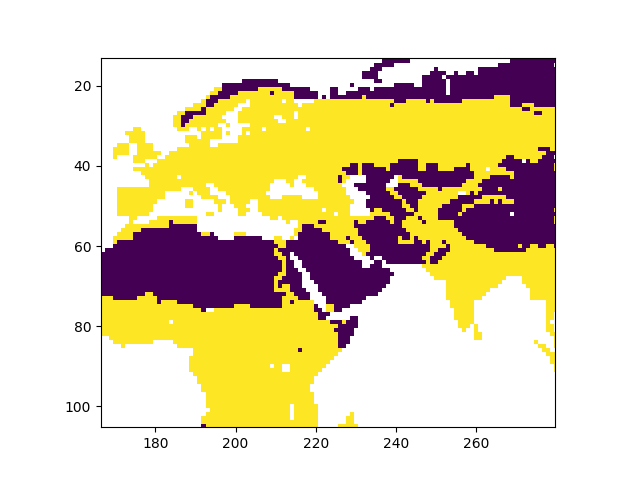

In [53]:
plt.imshow(upper >= 11)

In [30]:
tpt = ag_tpt > .75
tpt25 = ag_tpt > .25
tpt = tpt25
diff = tpt ^ tpt25
plt.imshow(tpt25)

In [31]:
river = np.load("./data/river.npy")
desert = np.load("./data/desert.npy")
# tpt = np.load("./data/terrestrial_plant_threshold.npy")
mask = np.load("./data/underwater_mask.npy")
steppes = np.load("./data/steppes.npy")

In [100]:
# agriculture = tpt & (desert == False) | (river & tpt)
agriculture = (upper >= 11.53) & (((desert == False)) | river) & (steppes == False)
m_ag = np.ma.array(agriculture, mask=mask)

In [101]:
overlap = steppes & agriculture
m_overlap = np.ma.array(overlap, mask=mask)

<IPython.core.display.Javascript object>


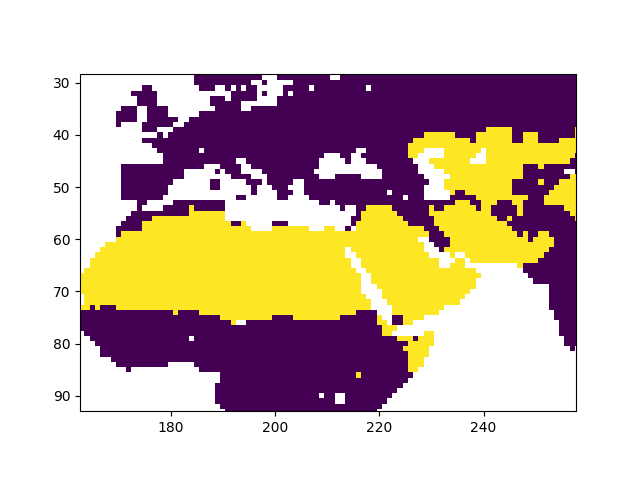

In [108]:
# plt.imshow(m_ag[20:90, 160:330])
arr = np.ma.array(desert, mask=mask)
plt.imshow(arr)

In [ ]:
"""
having a cutoff of 11 seems to work for the final era.

First era I think I used 

"""